# <center> UCS2612 Machine Learning Laboratory </center>


# <center> A8. Applications of Random Forest and AdaBoost Ensemble Techniques </center>

# Naveed Buhari
# 3122 21 5001 058
# CSE-A 

# Aim

Develop a python program to diagnose breast cancer using Ensemble Models. Visualize the features from the dataset and interpret the results obtained by the model using Matplotlib library.  



# Import libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Read dataset

In [46]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names =['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Hean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Hean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension', 'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']
data = pd.read_csv(url, names=names)



In [47]:
def read_name_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Parsing the content of the .name file
    feature_names = []
    for line in lines:
        if line.strip():
            feature_name = line.split(':')[0].strip()
            feature_names.append(feature_name)
    
    return feature_names

file_path = 'C:/Users/ashwi/Downloads/ML Lab/A8/breast+cancer+wisconsin+diagnostic/wdbc.names'
feature_names = read_name_file(file_path)
print("Feature names:", feature_names)


Feature names: ['1. Title', '2. Source Information', 'a) Creators', 'Dr. William H. Wolberg, General Surgery Dept., University of', 'Wisconsin,  Clinical Sciences Center, Madison, WI 53792', 'wolberg@eagle.surgery.wisc.edu', 'W. Nick Street, Computer Sciences Dept., University of', 'Wisconsin, 1210 West Dayton St., Madison, WI 53706', 'street@cs.wisc.edu  608-262-6619', 'Olvi L. Mangasarian, Computer Sciences Dept., University of', 'Wisconsin, 1210 West Dayton St., Madison, WI 53706', 'olvi@cs.wisc.edu', 'b) Donor', 'c) Date', '3. Past Usage', 'first usage', 'W.N. Street, W.H. Wolberg and O.L. Mangasarian', 'Nuclear feature extraction for breast tumor diagnosis.', 'IS&T/SPIE 1993 International Symposium on Electronic Imaging', 'and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.', 'OR literature', 'O.L. Mangasarian, W.N. Street and W.H. Wolberg.', 'Breast cancer diagnosis and prognosis via linear programming.', 'Operations Research, 43(4), pages 570-577, July-August 1995.',

In [48]:
import pandas as pd

def read_name_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    feature_names = []
    for line in lines:
        if line.strip():
            feature_name = line.split(':')[0].strip()
            feature_names.append(feature_name)
    
    return feature_names

file_path = 'C:/Users/ashwi/Downloads/ML Lab/A8/breast+cancer+wisconsin+diagnostic/wdbc.names'
feature_names = read_name_file(file_path)

new_dataframe = pd.DataFrame(columns=feature_names)
print(new_dataframe.head())


Empty DataFrame
Columns: [1. Title, 2. Source Information, a) Creators, Dr. William H. Wolberg, General Surgery Dept., University of, Wisconsin,  Clinical Sciences Center, Madison, WI 53792, wolberg@eagle.surgery.wisc.edu, W. Nick Street, Computer Sciences Dept., University of, Wisconsin, 1210 West Dayton St., Madison, WI 53706, street@cs.wisc.edu  608-262-6619, Olvi L. Mangasarian, Computer Sciences Dept., University of, Wisconsin, 1210 West Dayton St., Madison, WI 53706, olvi@cs.wisc.edu, b) Donor, c) Date, 3. Past Usage, first usage, W.N. Street, W.H. Wolberg and O.L. Mangasarian, Nuclear feature extraction for breast tumor diagnosis., IS&T/SPIE 1993 International Symposium on Electronic Imaging, and Technology, volume 1905, pages 861-870, San Jose, CA, 1993., OR literature, O.L. Mangasarian, W.N. Street and W.H. Wolberg., Breast cancer diagnosis and prognosis via linear programming., Operations Research, 43(4), pages 570-577, July-August 1995., Medical literature, W.H. Wolberg, W.N

In [49]:
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Hean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Hean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
data.shape

(569, 32)

In [51]:
data.describe()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Hean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Hean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data pre-processing

In [69]:
data.corr()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Hean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Hean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
Mean Radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Mean Texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
Mean Perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
Hean Area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
Mean Smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
Mean Compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
Mean Concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
Hean Concave Points,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
Mean Symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [53]:
data.drop('ID', axis=1, inplace=True)


In [54]:
data.dropna(inplace=True)


In [55]:
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

In [56]:
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)


In [57]:
scaler_normal = MinMaxScaler()
data_normalized = scaler_normal.fit_transform(data)


In [58]:
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

In [59]:
data_standardized.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Hean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Hean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [60]:
data_normalized.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Hean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Hean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# EDA

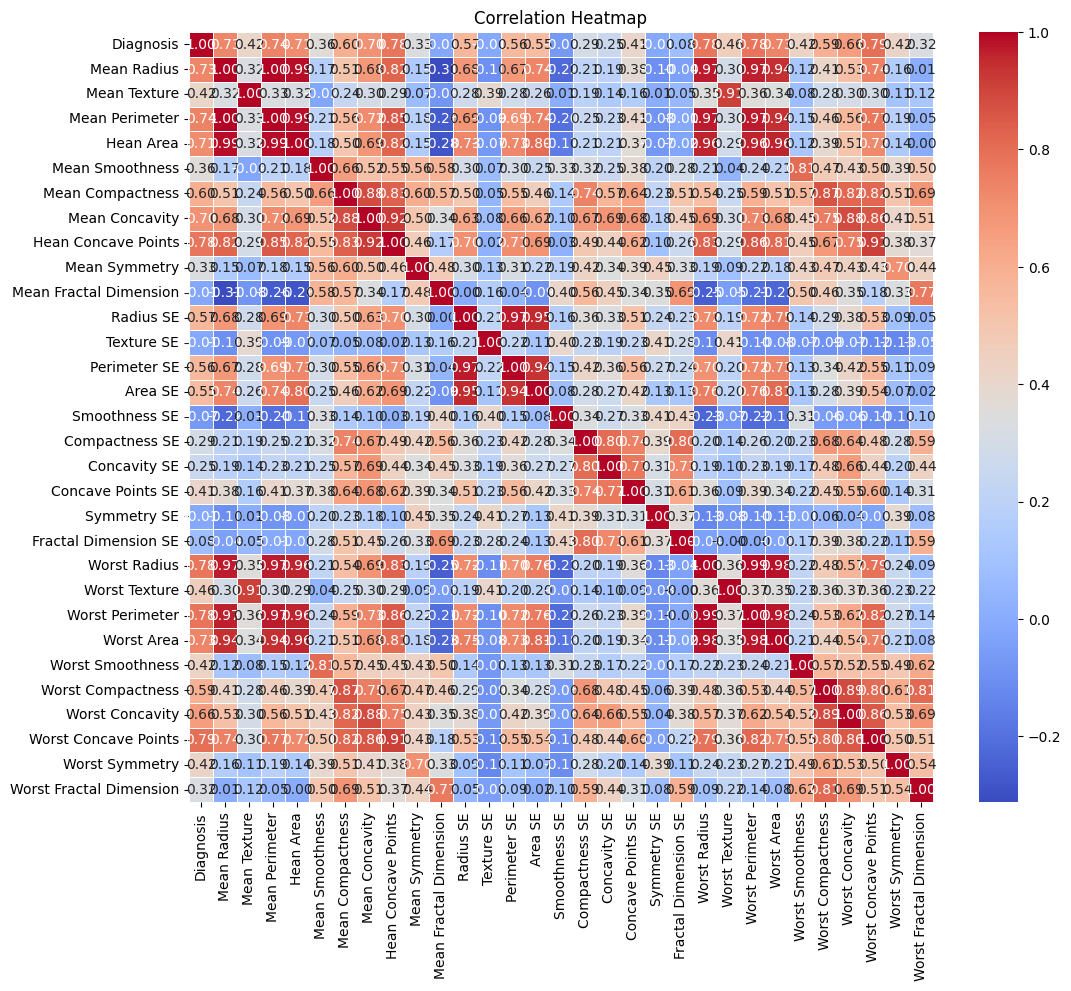

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature engineering for X(split done below and to run this cell, run the cell below and visit here again)

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
data_selected = pd.DataFrame(X_selected, columns=selected_features)
print("Selected Features:")
data_selected.head()


Selected Features:


,Mean Radius,Mean Perimeter,Hean Area,Mean Concavity,Hean Concave Points,Worst Radius,Worst Perimeter,Worst Area,Worst Concavity,Worst Concave Points
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


# Splitting the data into training and testing

In [63]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training and testing the models

In [65]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_train_predictions = random_forest.predict(X_train)
rf_test_predictions = random_forest.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forest - Training Accuracy:", rf_train_accuracy)
print("Random Forest - Testing Accuracy:", rf_test_accuracy)

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9649122807017544


In [66]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_train_predictions = gradient_boosting.predict(X_train)
gb_test_predictions = gradient_boosting.predict(X_test)
gb_train_accuracy = accuracy_score(y_train, gb_train_predictions)
gb_test_accuracy = accuracy_score(y_test, gb_test_predictions)
print("Gradient Boosting - Training Accuracy:", gb_train_accuracy)
print("Gradient Boosting - Testing Accuracy:", gb_test_accuracy)

Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Testing Accuracy: 0.956140350877193


# Plot ROC Curve

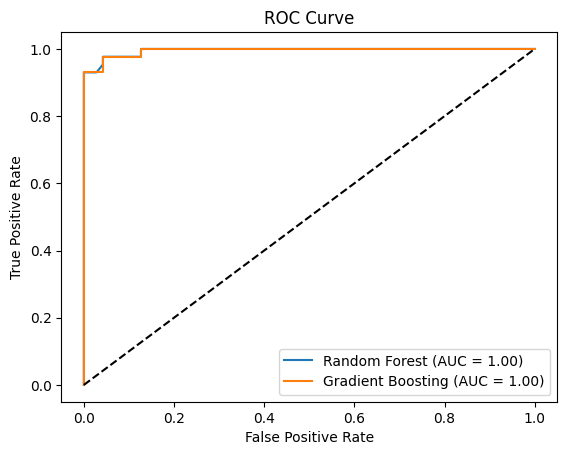

In [67]:
# Random Forest ROC curve
rf_probs = random_forest.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")

# Gradient Boosting ROC curve
gb_probs = gradient_boosting.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC = {gb_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature importance

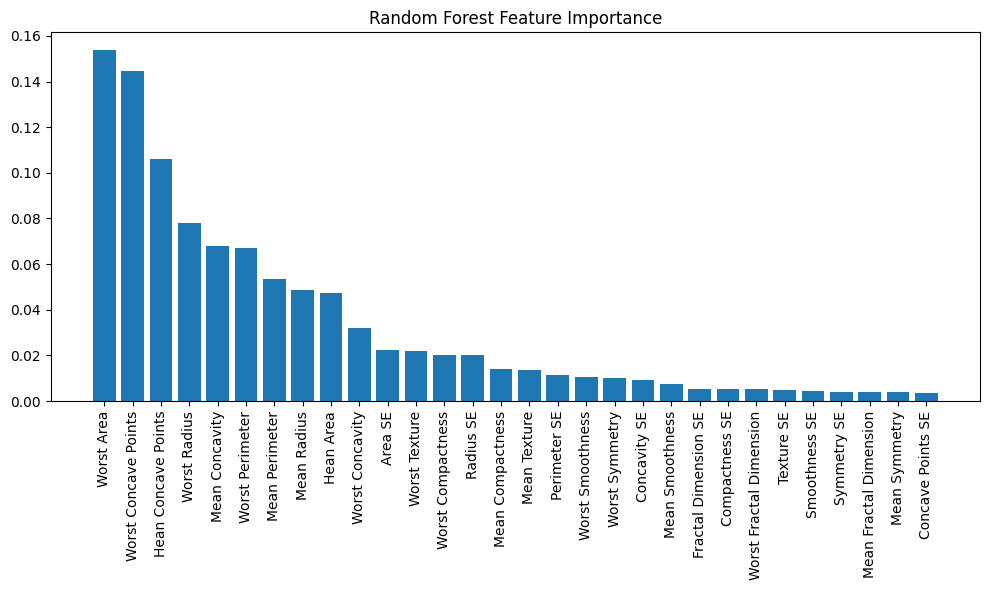

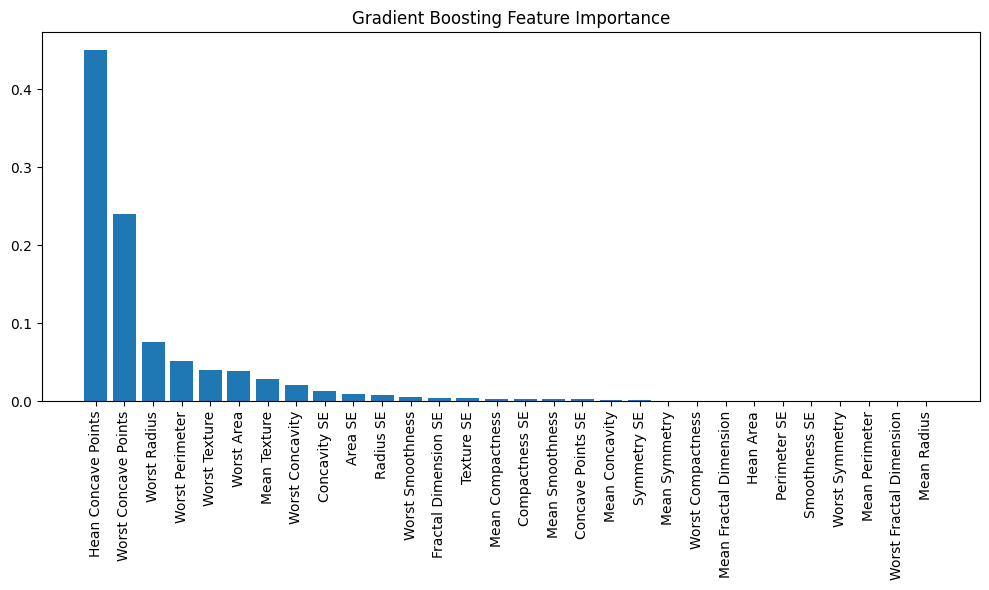

In [68]:
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(random_forest, X.columns, title='Random Forest Feature Importance')
plot_feature_importance(gradient_boosting, X.columns, title='Gradient Boosting Feature Importance')

# Inferences

1. Training data accuracy for both Random Forest and Gradient Boosting is the same(1.0) but the difference boils down to the testing accuracy where both perform equally good but the testing of Random Forest is marginally better than Gradient Boosting.

  - Gradient Boosting - Training Accuracy: 1.0
  - Gradient Boosting - Testing Accuracy: 0.956140350877193
  - Random Forest - Training Accuracy: 1.0
  - Random Forest - Testing Accuracy: 0.9649122807017544

2. Random forest takes in a lot of features as important ones than Gradient boosting which is visible in the diagram above.



# Learning Outcomes

1. Understood implementation of reading .name and .data datasets inside the Python notebook.

2. Understood the concept of label encoding of an object and applying preprocessing.

3. Understood how to apply Feature engineering in the dataset.

4. Understood the working behing ensemble models such as Gradient Boosting and Random Forest.

5. Understood implementation of ROC curves and Feature importance of the two models.